In [36]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# **Classification tasks in medical applications: An example of Khan data**
Khan data consist of a number of tissue samples corresponding to four types of small round blue cell tumors. For each tissue sample, 2308 gene expression measurements are available. Our task is to determine the type of tumor based on the gene expression measurements.

## Load Khan data and scale features

In [4]:
Khan = load_data('Khan') #load the Khan dataset
Khan['xtrain'].shape, Khan['xtest'].shape #number of instances and features in training and test data

((63, 2308), (20, 2308))

In [5]:
Khan['xtrain'].head

<bound method NDFrame.head of        G0001     G0002     G0003     G0004     G0005     G0006     G0007  \
0   0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
1  -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
2  -0.084469 -1.649739 -0.241308 -2.875286 -0.889405 -0.027474  1.159300   
3   0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
4   0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   
..       ...       ...       ...       ...       ...       ...       ...   
58 -2.683846 -2.117767 -0.523236 -2.174192 -0.448947  0.543022  1.338731   
59 -1.207646 -2.478130  0.094310  0.273456 -1.113218 -0.283690  1.105985   
60 -1.684161 -2.053384  0.563835  0.314446 -2.052605 -0.630172  1.570967   
61 -2.258568 -2.308603 -1.443076  0.233094 -1.779633 -0.030665  1.532665   
62 -1.146333 -3.007805 -0.029326  0.237835 -2.859455  0.042293  1.318417   

       G0008     G0009     G0010  ...     G2299     G2300

In [6]:
Xtrain = Khan['xtrain']
ytrain = Khan['ytrain']
Xtest = Khan['xtest']
ytest = Khan['ytest']

In [7]:
Xtrains = Xtrain - np.asarray(Xtrain.mean(0)) #scale features before applying logistic regression with penalty
Xtrain_scale = Xtrain.std(0)
Xtrains = Xtrains / np.asarray(Xtrain_scale)
Xtests = (Xtest - np.asarray(Xtrain.mean(0)))/np.asarray(Xtrain_scale) #note that we use training mean and std to scale test set

In [8]:
Xtrains.head

<bound method NDFrame.head of        G0001     G0002     G0003     G0004     G0005     G0006     G0007  \
0   0.734073 -0.772335 -0.333437 -1.379950  0.257913  0.469693 -0.573779   
1  -0.263798 -0.747322  0.942943 -1.467306  1.161451 -0.700034 -0.335851   
2  -0.271170  0.098570  0.010494 -1.509417  0.758989 -0.824010 -1.075692   
3   0.959388 -0.708443  1.245916 -0.556975  0.826337  0.654045 -1.255038   
4  -0.083516  0.011281  1.569996  1.134488 -0.696842 -0.286417 -0.824005   
..       ...       ...       ...       ...       ...       ...       ...   
58 -3.317297 -0.418262 -0.391420 -0.920587  1.432578  0.038923 -0.584384   
59 -1.587385 -0.816202  0.488946  1.135127  0.416714 -1.211563 -1.221676   
60 -2.145798 -0.347165  1.158298  1.169553 -1.019882 -1.735653  0.051511   
61 -2.818927 -0.628997 -1.702736  1.101228 -0.602428 -0.828838 -0.053365   
62 -1.515535 -1.401109  0.312693  1.105210 -2.253791 -0.718481 -0.640007   

       G0008     G0009     G0010  ...     G2299     G2300

## Fit logistic regression model with L2 (ridge) and L1 (lasso) norms

### with ridge penalty

In [29]:
lr_l2 = LogisticRegression(penalty='l2',C=1) #train a logistic regression model with ridge penalty, C is the inverse of lambda in lecture notes
lr_l2.fit(Xtrains,ytrain)

LogisticRegression(C=1)

In [30]:
lr_l2.coef_.shape #in multi-class classification, we obtain four rows of coefficients, each for one class

(4, 2308)

In [32]:
lr_l2.coef_[1,lr_l2.coef_[1,:]>=0.02] #only a small amount of coeffients are greater than 0.02, most of them are close to zero

array([0.02266314, 0.03744106, 0.02031781, 0.02068257, 0.02185804,
       0.02041256, 0.0225163 , 0.0339802 , 0.03361891, 0.02458449,
       0.02209772, 0.02208459, 0.02042243, 0.02487085, 0.0202169 ,
       0.03145239, 0.02664082, 0.03305644, 0.02144974, 0.02988831,
       0.022254  , 0.02031647, 0.02718881, 0.02077073, 0.03672723,
       0.0236646 ])

In [33]:
np.count_nonzero(lr_l2.coef_==0) #however, no coefficient is exactly zero

0

Play with `C` to see any changes in coefficients

### with lasso

In [25]:
lr_l1 = LogisticRegression(penalty='l1',C=1,solver='saga') #train a logistic regression model with ridge penalty, C is the inverse of lambda in lecture notes
lr_l1.fit(Xtrains,ytrain)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, penalty='l1', solver='saga')

In [26]:
np.count_nonzero(lr_l1.coef_==0)#now with lass penalty, we obtain a lot of zeros in coefficients

8232

In [27]:
np.where( lr_l1.coef_[1,:] != 0) #take the indexes of non-zero coefficients

(array([   1,    8,   28,   31,   35,   50,   51,   59,   60,   64,   66,
          74,   79,   88,   96,  106,  118,  128,  131,  138,  140,  150,
         151,  158,  181,  186,  187,  215,  219,  228,  237,  240,  243,
         245,  247,  254,  256,  262,  263,  267,  290,  293,  312,  320,
         335,  339,  347,  360,  364,  367,  371,  372,  377,  383,  399,
         406,  407,  408,  414,  419,  429,  436,  468,  476,  480,  482,
         502,  503,  508,  509,  520,  527,  532,  533,  544,  553,  565,
         570,  603,  606,  620,  625,  633,  635,  639,  641,  649,  651,
         654,  670,  688,  693,  700,  701,  705,  712,  713,  730,  735,
         743,  750,  759,  760,  761,  777,  778,  788,  807,  811,  819,
         822,  823,  824,  827,  831,  836,  838,  841,  850,  854,  856,
         864,  866,  874,  882,  890,  902,  936,  946,  950,  952,  963,
         969,  970,  972,  975,  978,  981,  997,  999, 1002, 1011, 1019,
        1020, 1022, 1024, 1037, 1040, 

In [28]:
Xtrains.columns[np.where( lr_l1.coef_[1,:] != 0)] #identify gene expression measures that are selected by lasso with C=1, 
#and note that the original number of features is 2309

Index(['G0002', 'G0009', 'G0029', 'G0032', 'G0036', 'G0051', 'G0052', 'G0060',
       'G0061', 'G0065',
       ...
       'G2248', 'G2253', 'G2258', 'G2275', 'G2276', 'G2278', 'G2300', 'G2301',
       'G2302', 'G2303'],
      dtype='object', length=335)

Again, play with different values of `C` to see any changes in the coefficients.

### predict test set with fitted models

In [34]:
pred_l2 = lr_l2.predict(Xtests) #prediction with ridge
pred_l1 = lr_l1.predict(Xtests) #prediction with lasso

In [37]:
print('The accuracy of LR with ridge penalty is', accuracy_score(pred_l2, ytest)) #check accuracies
print('The accuracy of LR with lasso is', accuracy_score(pred_l1, ytest))

The accuracy of LR with ridge penalty is 0.9
The accuracy of LR with lasso is 1.0


The accuracy of LR with lasso is higher than that of LR with ridge penalty. However, this is under the scenario that we set `C=1` for both models. In real applications, we have to determine the best `C` for each model separately, and compare them fairly. We will learn how to do this next week.

## Draw coefficient paths against the value of `C` (or $\lambda$ in lecture)
However, note that here `C` is the inverse of $\lambda$.

### with ridge penalty

In [73]:
Cs = np.logspace(-5, 1, 300)

coefs = []
acc = []
for c in Cs:
    lr_l2 = LogisticRegression(penalty='l2',C=c,max_iter=500) #train a logistic regression model with ridge penalty
    lr_l2.fit(Xtrains,ytrain)
    coefs.append(lr_l2.coef_[1,:])
    pred_l2 = lr_l2.predict(Xtests)
    acc.append(accuracy_score(pred_l2, ytest))

[Text(0.5, 0, 'lambda'),
 Text(0, 0.5, 'coefficients'),
 Text(0.5, 1.0, 'Lasso coefficients as a function of lambda')]

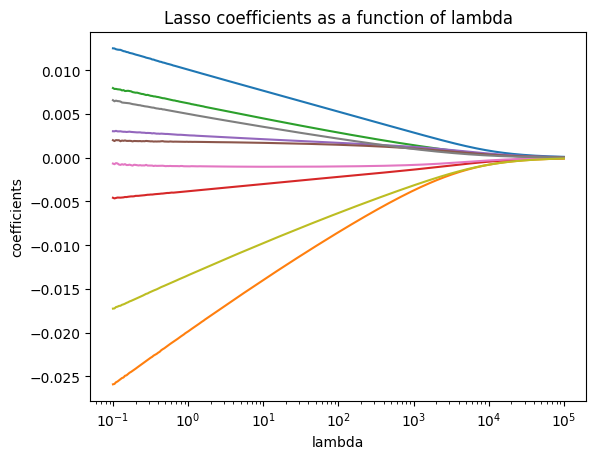

In [74]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(coefs)[:,0:9]) #have a look at the paths for the first 10 gene expression measures 
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='coefficients', title='Lasso coefficients as a function of lambda') 

In [75]:
fig.savefig('ridge-path.png')

[Text(0.5, 0, 'lambda'),
 Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Accuracy as a function of lambda')]

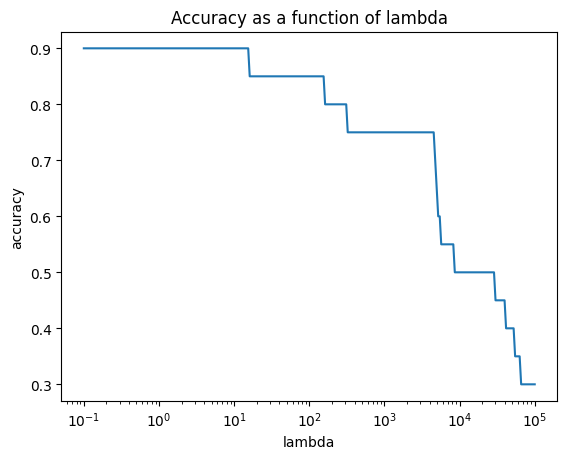

In [76]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(acc)) #have a look at accuracy against lambda
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='accuracy', title='Accuracy as a function of lambda')

In [77]:
fig.savefig('ridge-acc.png')

### with lasso

In [62]:
Cs = np.logspace(-1, 3, 200)

coefs = []
acc = []
for c in Cs:
    #note that lasso usually needs more iterations to converge, so you will see warnings regarding to non-convergence. change max_iter to allow more iterations
    lr_l1 = LogisticRegression(penalty='l1',C=c,max_iter=1000,solver='saga') #train a logistic regression model with lasso penalty
    lr_l1.fit(Xtrains,ytrain)
    coefs.append(lr_l1.coef_[1,:])
    pred_l1 = lr_l1.predict(Xtests)
    acc.append(accuracy_score(pred_l1, ytest))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

[Text(0.5, 0, 'lambda'),
 Text(0, 0.5, 'coefficients'),
 Text(0.5, 1.0, 'Lasso coefficients as a function of lambda')]

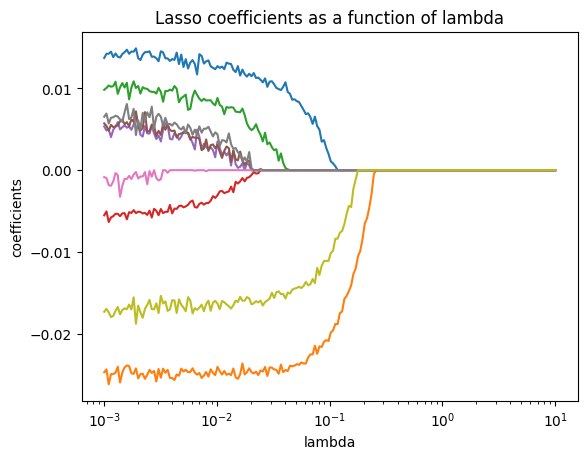

In [69]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(coefs)[:,0:9]) #have a look at the paths for the first 10 gene expression measures 
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='coefficients', title='Lasso coefficients as a function of lambda') 

In [67]:
fig.savefig('lasso-path.png')

[Text(0.5, 0, 'lambda'),
 Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Accuracy as a function of lambda')]

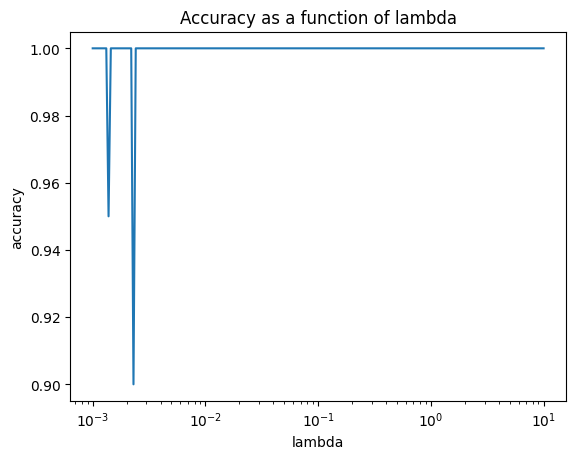

In [71]:
fig, ax = subplots()
ax.plot(1/Cs,np.asarray(acc)) #have a look at accuracy against lambda
ax.set_xscale("log")
ax.set(xlabel='lambda', ylabel='accuracy', title='Accuracy as a function of lambda') 

In [72]:
fig.savefig('lasso-acc.png')

In the end, we see that by changing the values of `C`, the accuracies of LR with lasso are still higher than LR with ridge penalty. This may suggests that in this dataset with a large amount of features, only few of them are valuable to the final decision. In other words, only few gene expression measures are important to detemine the types of tumors. By investigating the coefficients of LR with lasso, we could also identify which ones are important.